## Notebook Description

This sample Jupyter notebook demonstrates how easily analytic market data reports can be created with Monitor+. The Chart library used is Matplotlib. See the 'Imports' section below for a list of the other libraries used.

The report downloads two daily market data datasets (time series). The data is requested as daily values set as business days (5 day week), filled forward with a common start date. The datasets are then converted to a Pandas data frame. The data is then requested again as  monthly values. Finally we create 6 charts displaying both daily and non daily values (defined in the 'Global Variables' section below). 

The datasource, symbol, frequency and all paramerters can be changed in the 'Global Variables'section below. We use Pandas for the data frame. See the 'Imports' section below for a list of the other libraries used.

Favorite datasets can be viewed using the <em><span style="color: Black">'List my Favorite Datasets'</span></em> notebook or subscribers can click on the <a href="https://myfavorites.sarus.com">Sarus web portal</a> link to view and manage their favorite datasets.




<b>Disclaimer.</b><br>
We offer these reports for informational purposes only and are provided ‘as is’ without warranty of any kind, either express or implied, including, but not limited to, the implied warranties of fitness for a purpose, or the warranty of non-infringement.  Please refer to our <a href="https://www.sarus.com/terms-and-conditions">Terms and Conditions</a> for more information. Any links on this site are provided as a convenience and for informational purposes only; they do not constitute an endorsement or an approval by the us of any of the products, services or opinions of the corporation or organization or individual. We bear no responsibility for the accuracy, legality or content of the external site or for that of subsequent links. Contact any external sites for answers to questions regarding its content.  The market data used in the reports below may be generated sample data and as such not representative on any real or published values. Do not use any of the report values for any purpose other than to demonstrate the functionality of the  Monitor+ service.

<b>Notice:</b> The API key  used in this report is for demonstration purposes only and may return <em>simulated market data</em> (not actual market data data) or return a limited selection or range of market data.<br>
Do not use any data returned with this demonstration API key except to test the functionality of the Monitor+ API in a testing environment. Subscribers should replace the default API key (in the 'Global Variables' section) with their own API key in order to get valid market data.

If you have any questions about this report, please go to the Sarus web site www.sarus.com  and use the <a href="https://www.sarus.com/contact-us"> 'Contact'</a> menu to get in  touch or email us at support@sarus.com


## Imports

In [23]:
#  IData is the Monitor+ API class
from monitorplus import IData 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

## Global Variables

In [24]:
# Customers API Key needed to request for data from the Monitor+ API
# To get updated values, change this API key to your own key.
# The key below may retuen test data only and not actual market values.  
API_KEY = "PD3MV-7KO96-HEZSL-4U8JX"

# define colours used (see  https://i.stack.imgur.com/9UVnC.png)
BOLD = '\033[01m'
RESET = '\033[0m'
BLACK_FG = '\033[30m'
GREEN_FG = '\033[32m'
WHITE_FG = '\033[37m'

RED_BG = '\033[101m'
#  hmmm  '\033[47m' and '\033[107m' not working
WHITE_BG = ''


# ANSI code Combinations used in labels
WARNING_LABEL =  WHITE_FG + RED_BG
SUCCESS_LABEL=  GREEN_FG + WHITE_BG 
NORMAL_LABEL =BLACK_FG + WHITE_BG

print ( SUCCESS_LABEL+ " The Daily API command was run successfully. \n")

#  number of rows to list in the  table outouts
Data_Rows=18

#  The full API documentation for getting the data is at:   
#       https://dev2.idatamedia.org/api-docs#getdatasetvaluesrc

# Sample Dataset #1 to use in the Notebook
API_Datasource1 = "ECBFX"
API_DSSymbol1 = "EURJPY"
# the Name below  will be filled from the API if the request is successful
API_DSName1 = ""

# Sample Dataset  #2 to use in the Notebook
API_Datasource2 = "ECBFX"
API_DSSymbol2 = "EURCAD"
# the Name below  will be filled from the API if the request is successful
API_DSName2 = ""

# The earliest date to request from the API
API_StartDate = "2010-01-01"

# Force common start date for both series
API_CommonStart=True

#  Fill the daily data before (prefill happens before calculating monthly averages)
API_Prefill=True

# Weekends can be added or removed by setting the value to "7"  or "5"
# "5" means only weekdays (no weekends) are returned. 
# Refer to th API documentation for many more options
API_WeekType = "5"


# API_PrefillType can be "previous",  "midpoint" or "interpolate"
API_PrefillType = "interpolate"

# We can choose to have 3 non-daily charts in almost any fqequency. 
# Valid simply Frequencies are: 
#  w, hm, m, q, hy  y  for week, half-month, month, quarter-year, half-year and year.
# Check the API documentation "Frequency Parameter" and "Frequency Options" sections for examples of custom frequencies and weekend handling.
#      https://dev2.idatamedia.org/api-docs#getdatasetvaluesrc

NonDailyChartFreq = "q"
NonDailyChartFreqDesc = "quarterly"

   

 The Daily API command was run successfully. 



## API - Initialisation and return values for two daily datasets

The full list of the parameters used in the API request to get market data can be <a href="https://dev2.idatamedia.org/api-docs#getdatasetvaluesrc">viewed here</a>


In [25]:
# initialise the Python class
idata = IData()
# turn off comments from  Monitor+
idata.set_verbose(False)

RC_DayResult =  None

#Store the API Key in the Python Class
idata.set_api_key(API_KEY)

# We will return the metadata for the user favorite datasets
# Now request historical prices for two datasets in RC ( row x column) format.
RC_DayResult = idata.get_dataset_values_rc(
    Series=[
        # You can change the datasources and symbols in the Global Variable section above
        # For HandleWeekend parameters - see HandleWeekends section at the  "Viewed Here"  link above. 5a = 5 day adjusted.
        {"Datasource": API_Datasource1,"Symbol": API_DSSymbol1, "HandleWeekends":API_WeekType,"Fill":True, },
        {"Datasource": API_Datasource2,"Symbol": API_DSSymbol2, "HandleWeekends":API_WeekType,"Fill":True }
    ],
    # Additional API parameters
    StartDate = API_StartDate,
    CommonStart = API_CommonStart,
    Frequency = "d",
    Prefill = API_Prefill,
    # For missing valuess are filled
    FillOptions = {"Type": API_PrefillType},
     )
    
if (RC_DayResult is None):
       print (WARNING_LABEL +'\n The RC_Result API call returned an error. \n' + RESET)
else:
    print ( SUCCESS_LABEL+ " The Get Data API command was run successfully. \n"+RESET)
    
    
    
    
    
    



 The Get Data API command was run successfully. 



# Display the API market data in a table.

In [27]:
#Access the Monitor+ utility file that helps us to process the report data.
from monitorplus_utils import MonitorUtils
from IPython.display import display

API_DSName1Day = ""
API_DSName2Day = ""

# Check we have data from the 'API Initialisation' section above using its RC_Result variable
if (RC_DayResult is None):
    print ('\033[1m' +'\nThe  API request for daily data failed. Please check the "API Initialisation" section above.' + '\033[0m')   
else:
    # Extract the names for the datasets.  We can use them later to check if the extract was successful.
    API_DSName1Day, API_DSName2Day = RC_DayResult["Columns"][0]['Name'], RC_DayResult["Columns"][1]['Name']
    
    #  Check datasets are loaded OK
    if API_DSName2Day > "":
        mu = MonitorUtils(API_DSName1Day, API_DSName2Day)
        df = mu.get_display_data(RC_DayResult)
        # show the latest elements in a table - rows defined in global Data_Rows variable
        print(SUCCESS_LABEL +"\nThe latest "+str(Data_Rows)+" daily data rows:\n"+RESET)
  
        display(df.tail(Data_Rows))
        
        # The methods we use require our data to be a Time-Series. 
        df["Date"] = pd.to_datetime(df["Date"])
        df.set_index("Date", inplace=True)   
    else:
        print(WARNING_LABEL + '\n Dataset number 2 was not returned from the Monitor+ Utils class. ' + RESET)



The latest 18 daily data rows:



,Date,Year,Month,ECB - Euro vs Japanese Yen,ECB - Euro vs Canadian Dollar
3113,2021-12-08,2021,12,128.969553,1.435573
3114,2021-12-09,2021,12,128.122358,1.435254
3115,2021-12-10,2021,12,128.315149,1.439984
3116,2021-12-13,2021,12,128.155450,1.445347
3117,2021-12-14,2021,12,128.045227,1.448589
3118,2021-12-15,2021,12,128.880202,1.449341
3119,2021-12-16,2021,12,128.833806,1.448628
3120,2021-12-17,2021,12,127.788827,1.448681
3121,2021-12-20,2021,12,128.195811,1.459014
3122,2021-12-21,2021,12,128.657776,1.458452


# Request the non-daily data.
The full list of the parameters used in the API request to get market data can be <a href="https://dev2.idatamedia.org/api-docs#getdatasetvaluesrc">viewed here</a>


In [28]:
# The frequency used is defined in the 'Global Variables' section at the top of the page in  variable 'NonDailyChartFreq'
# set success flag
RC_NDResult =  None


# Check we have data from the 'API Initialisation' section above using its RC_Result variable
if (RC_DayResult is None):
     print (WARNING_LABEL +'\nThe  API request for daily data failed. Please check the "API Initialisation" section above.' )   
    
else:
    # Now request historical non-daily prices for two datasets in RC (row x column) format.
    RC_NDResult = idata.get_dataset_values_rc(
    Series=[

        # You can change the datasources and symbols in the Global Variable section above
        # For HandleWeekend parameters - see HandleWeekends section at the  "Viewed Here"  link above. 5a = 5 day adjusted.
        {"Datasource": API_Datasource1,"Symbol": API_DSSymbol1, "HandleWeekends":API_WeekType,"Fill":True, },
        {"Datasource": API_Datasource2,"Symbol": API_DSSymbol2, "HandleWeekends":API_WeekType,"Fill":True }
         ],
    # Additional API parameters
    StartDate = API_StartDate,
    Frequency = NonDailyChartFreq,
    CommonStart = API_CommonStart,
    Prefill = API_Prefill,
    FillOptions = {"Type": API_PrefillType},
    )

if (RC_NDResult is None):
       print (WARNING_LABEL +'\n The '+NonDailyChartFreqDesc.upper()+' API call returned an error. \n' + RESET)
else:
    print ( SUCCESS_LABEL+ " The "+NonDailyChartFreqDesc+" API command was run successfully. \n"+ RESET)


 The quarterly API command was run successfully. 



# Display the non-daily data in a table.

In [29]:
# Check we have data from the "Get non-daily data" section above using its RC_NDResult variable
if (RC_NDResult is None):
    print ('\033[1m' +'\nThe non-daily API request failed. Please check the "Get non-daily data" section above.' + '\033[0m')   
else:
    # Extract the names for the datasets.  We can use them later to check if the extract was successful.
    API_DSName1ND, API_DSName2ND = RC_NDResult["Columns"][0]['Name'], RC_NDResult["Columns"][1]['Name']
    
    #  Check datasets are loaded OK
    if API_DSName2ND > "":
        mu = MonitorUtils(API_DSName1ND, API_DSName2ND)
        df_ND = mu.get_display_data(RC_NDResult)
        print(SUCCESS_LABEL+"\n\nWhere available, the latest "+str(Data_Rows)+" "+NonDailyChartFreqDesc+" data rows are displayed:\n")
        # show the latest elements in a table - rows defined in global Data_Rows variable
        display(df_ND.tail(Data_Rows))
        
        # The methods we use require our data to be a Time-Series. 
        df_ND["Date"] = pd.to_datetime(df_ND["Date"])
        df_ND.set_index("Date", inplace=True)   
    else:
        print(WARNING_LABEL + '\n Dataset number 2 was not returned from the Monitor+ Utils class. ' + RESET)



Where available, the latest 18 quarterly data rows are displayed:



,Date,Year,Month,ECB - Euro vs Japanese Yen,ECB - Euro vs Canadian Dollar
30,2017-09-29,2017,9,130.349231,1.472806
31,2017-12-29,2017,12,132.944116,1.495916
32,2018-03-30,2018,3,133.168467,1.553807
33,2018-06-29,2018,6,130.072798,1.538376
34,2018-09-28,2018,9,129.606462,1.520752
35,2018-12-31,2018,12,128.735820,1.507092
36,2019-03-29,2019,3,125.093118,1.510954
37,2019-06-28,2019,6,123.567943,1.503619
38,2019-09-30,2019,9,119.323485,1.468129
39,2019-12-31,2019,12,120.357926,1.461451


# Creating the Daily Charts.

Plotting the two daily API datasets as daily charts.

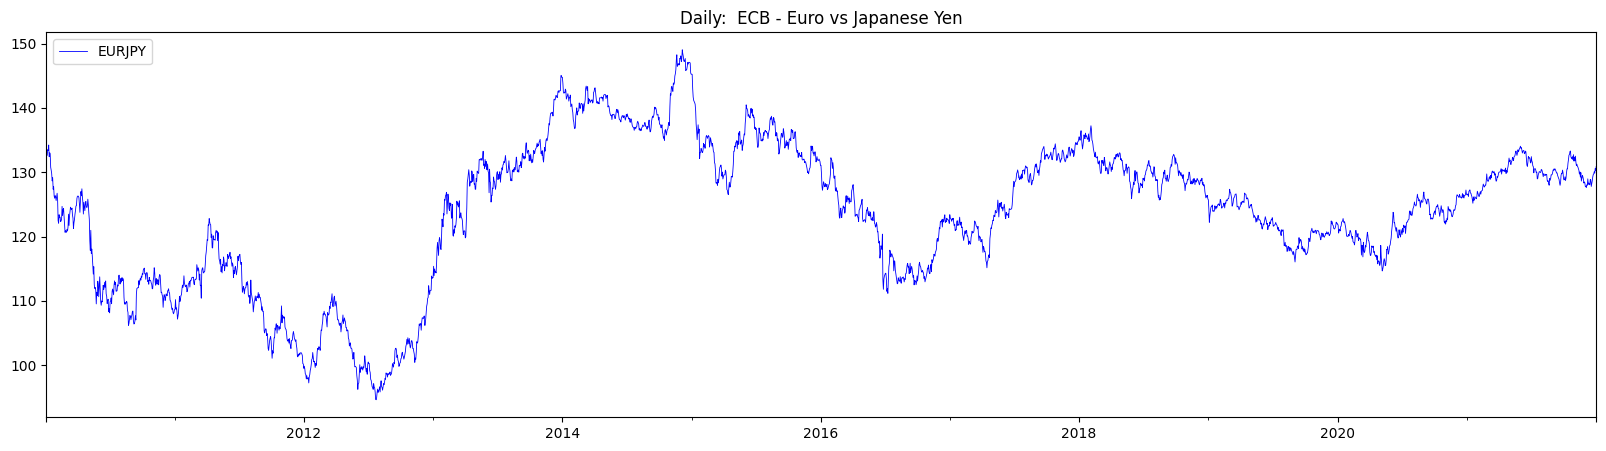

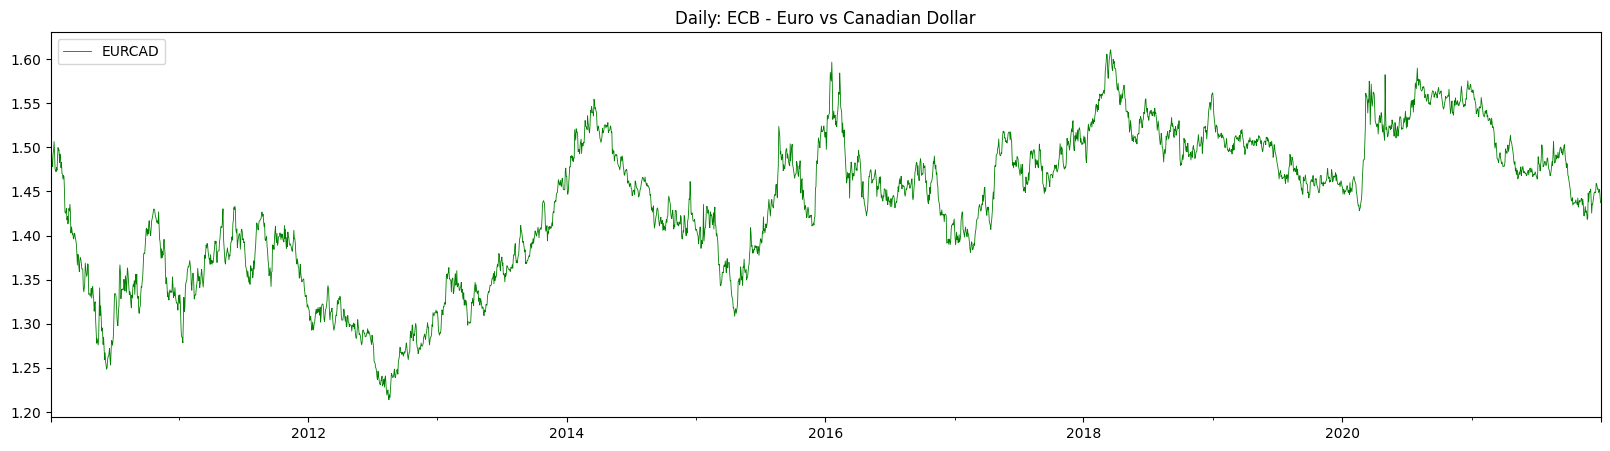

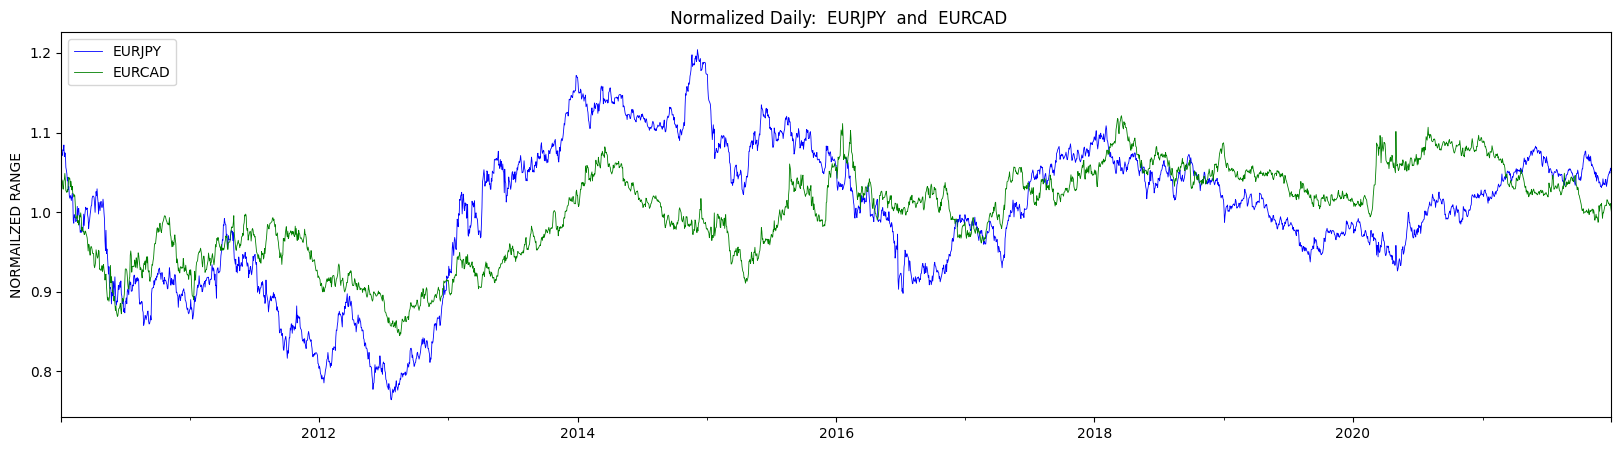



Creating the quarterly average charts. 


In [30]:
#  Check datasets are loaded in case code is run out of sequence
if API_DSName2Day > "":
    df[API_DSName1Day].plot(figsize=(20,5), title = API_DSName1Day,  color = 'blue',  linewidth=.6,  label=API_DSSymbol1)
    plt.title(f"Daily:  {API_DSName1Day}")
    plt.legend(loc='upper left')
    ax = plt.subplot()
    ax.set_xlabel('')
    plt.show()
 
    df[API_DSName2Day].plot(figsize=(20,5), title = API_DSName2Day, color = 'green', linewidth=.6,   label=API_DSSymbol2)
    plt.title(f"Daily: {API_DSName2Day}")
    plt.legend(loc='upper left')
    ax = plt.subplot()
    ax.set_xlabel('')
    plt.show()
    
    # We normalize the datasets to a common range to show them overlaid. We use the "mean" to calculate the average
    df[API_DSName1Day].div(df[API_DSName1Day].mean()).plot(figsize=(20,5), title = API_DSName1Day, color = 'blue',linewidth=.6, label=API_DSSymbol1)
    df[API_DSName2Day].div(df[API_DSName2Day].mean()).plot(figsize=(20,5), title = API_DSName2Day,  linestyle = 'solid', color = 'green',linewidth=.6, label=API_DSSymbol2)
    plt.title("Both Series")
    plt.title(f" Normalized Daily:  {API_DSSymbol1}  and  {API_DSSymbol2}")
    plt.legend(loc='upper left')
    ax = plt.subplot()
    ax.set_xlabel('')
    ax.set_ylabel('NORMAILZED RANGE')    
    plt.show()    
    print( SUCCESS_LABEL + '\n\nCreating the '+NonDailyChartFreqDesc+' average charts. ' + RESET)
else:
    print(WARNING_LABEL + '\n\n Daily Chart: No dataset was loaded from the API for series number 2. ' + RESET)



# Creating the non-daily Charts.

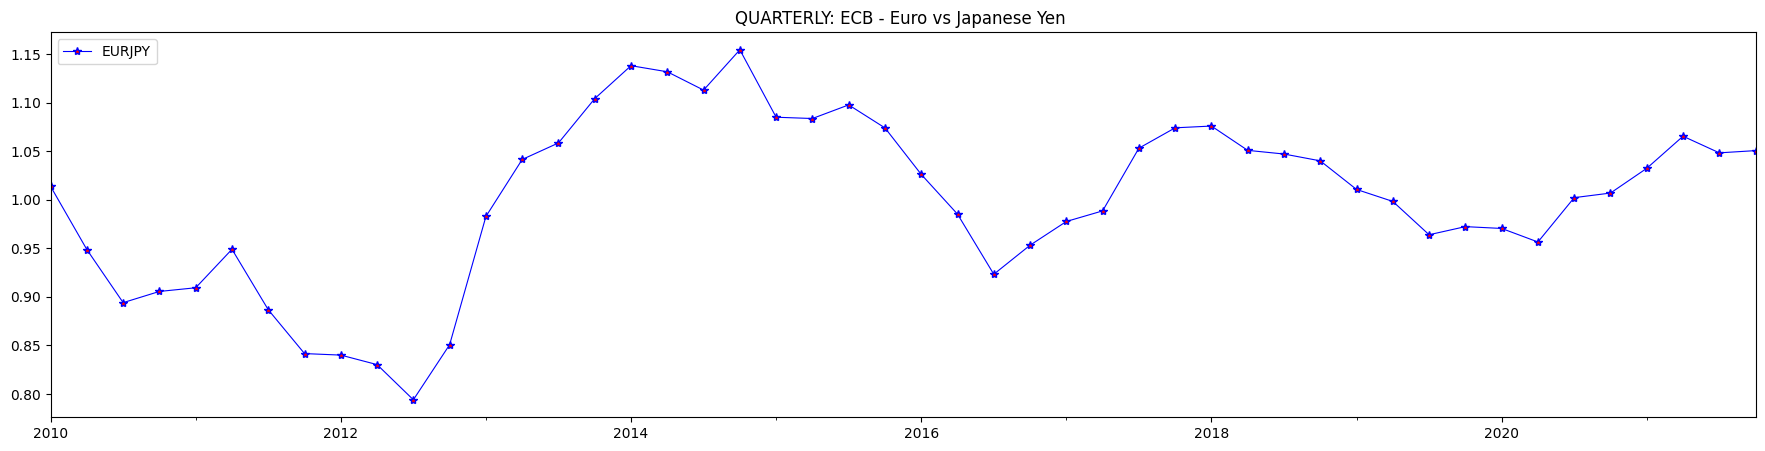

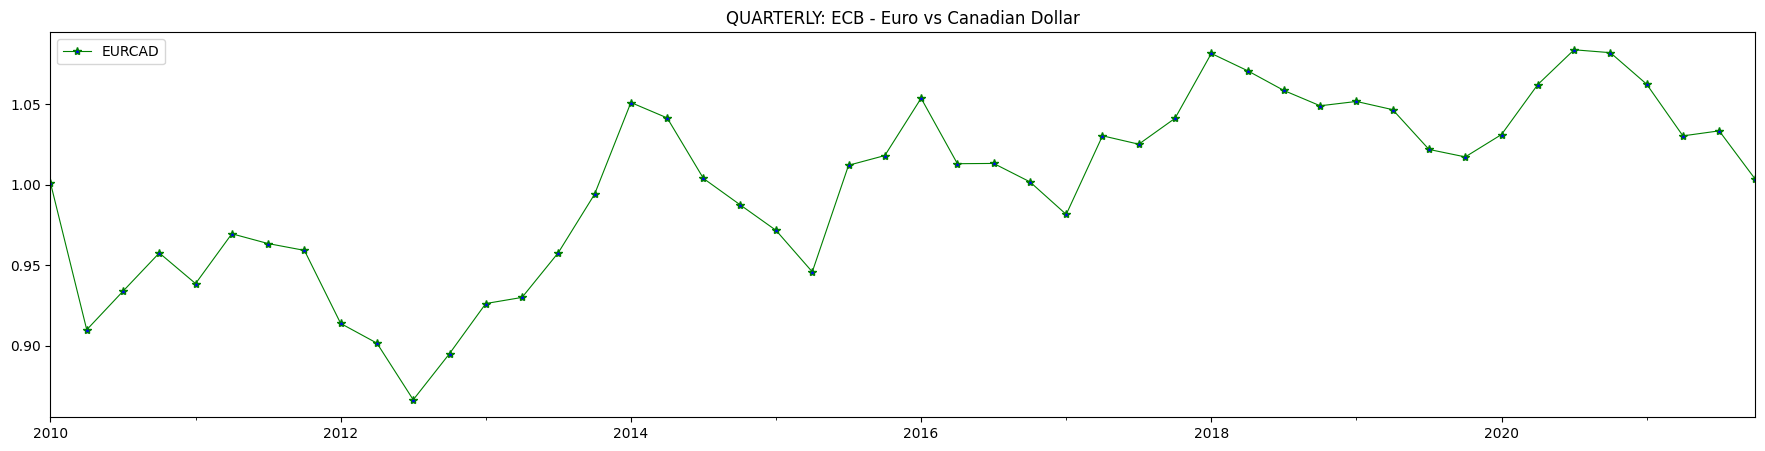

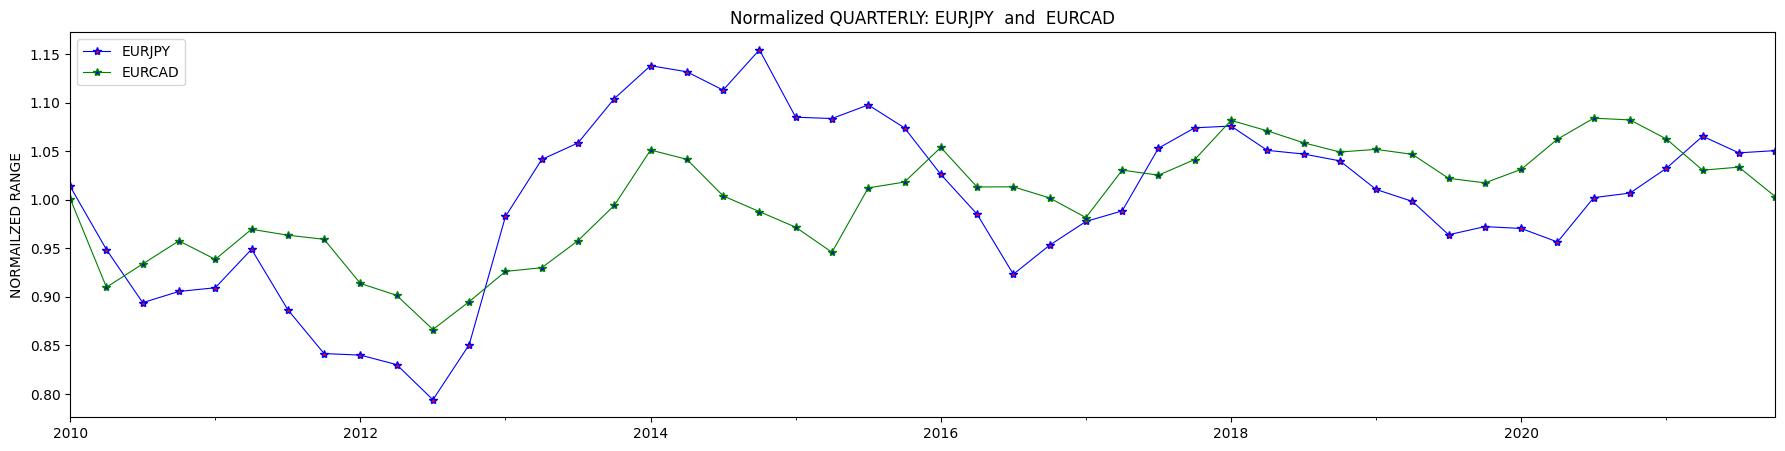

In [31]:
#  Check datasets are loaded


if (API_DSName2Day > "")  and (RC_NDResult is not None):
    df_ND[API_DSName1ND].div(df_ND[API_DSName1ND].mean()).plot(figsize=(22,5), title = API_DSName1ND, marker = '*', color = 'blue', markerfacecolor = 'r', linewidth=.8,   label=API_DSSymbol1)
    plt.title(f"{NonDailyChartFreqDesc.upper()}: {API_DSName1ND} ")
    plt.legend(loc='upper left')
    ax = plt.subplot()
    ax.set_xlabel('')
    plt.show()    
    
    df_ND[API_DSName2ND].div(df_ND[API_DSName2ND].mean()).plot(figsize=(22,5), title = API_DSName2ND, marker = '*', color = 'green', markerfacecolor = 'b', linewidth=.8, label=API_DSSymbol2)
    plt.title(f"{NonDailyChartFreqDesc.upper()}: {API_DSName2ND}")
    plt.legend(loc='upper left')
    ax = plt.subplot()
    ax.set_xlabel('')
    plt.show()    
    
    df_ND[API_DSName1ND].div(df_ND[API_DSName1ND].mean()).plot(figsize=(22,5), title = API_DSName1ND,marker = '*', color = 'blue', markerfacecolor = 'r', linewidth=.8,   label=API_DSSymbol1)
    df_ND[API_DSName2ND].div(df_ND[API_DSName2ND].mean()).plot(figsize=(22,5), title = API_DSName2ND,marker = '*', color = 'green', markerfacecolor = 'b', linewidth=.8, label=API_DSSymbol2)
    plt.title(f"Normalized {NonDailyChartFreqDesc.upper()}: {API_DSSymbol1}  and  {API_DSSymbol2}")
    plt.legend(loc='upper left')
    ax = plt.subplot()
    ax.set_xlabel('')
    ax.set_ylabel('NORMAILZED RANGE')
    plt.show() 
else:
    print(WARNING_LABEL + '\n'+NonDailyChartFreqDesc.upper()+' Charts: Non-daily data is not available for series #2 ('+API_DSName2Day+').' + RESET)
